In [217]:
# Constants

# The minimum percentiles to consider someone apto
MIN_PERCENTILE = 80

# Exploring data

In [218]:
# Opening data from cvs files using pandas
import csv
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


# Function to read data from csv file

user_tests = pd.read_csv('user_tests.csv')
users = pd.read_csv('users.csv')
ranking_specials = pd.read_csv('ranking_specials.csv')
questions = pd.read_csv('questions.csv')
topics = pd.read_csv('topics.csv')
user_test_answers = pd.read_csv('user_test_answers.csv')


## Exploring Users table

In [219]:
users.head()

,id,username,totalQuestions,rightQuestions,wrongQuestions,createdAt,updatedAt,goal,goalDate,goalWeek,enabled,lastUsed,isPremium,tutorial
0,806,Mick,10,4,6,2022-11-29T08:10:19.638049+00:00,2022-11-29T08:10:19.638049+00:00,10.0,2022-11-28T00:00:00.000246+00:00,NaN,True,NaN,False,False
1,805,MarinaL,20,3,17,2022-11-29T07:25:09.849273+00:00,2022-11-29T07:25:09.849273+00:00,20.0,2022-11-28T00:00:00.000197+00:00,NaN,True,NaN,False,False
2,796,Lauradub,0,0,0,2022-11-28T17:26:01.948714+00:00,2022-11-28T17:26:01.948714+00:00,0.0,2022-11-28T00:00:00.000454+00:00,NaN,True,NaN,False,False
3,795,tukiresulona,10,4,6,2022-11-28T17:20:15.262594+00:00,2022-11-28T17:20:15.262594+00:00,10.0,2022-11-28T00:00:00.000421+00:00,NaN,True,NaN,False,False
4,53,Marta.Ponce,10,0,10,2022-11-28T14:14:45.673785+00:00,2022-11-28T14:14:45.673785+00:00,0.0,2024-08-26T00:00:00.000904+00:00,140.0,True,NaN,True,False


In [220]:
# Drop users with less than 100 answers 
users = users[users['totalQuestions'] > 100]

In [221]:
# Sorting users by totalQuestions
users = users.sort_values(by='totalQuestions', ascending=False)
users.head()

,id,username,totalQuestions,rightQuestions,wrongQuestions,createdAt,updatedAt,goal,goalDate,goalWeek,enabled,lastUsed,isPremium,tutorial
8730,2807,carlos1826,75031,62765,10057,2023-04-18T12:47:47.690058+00:00,2023-04-18T12:47:47.690058+00:00,337.0,2024-12-09T00:00:00.000235+00:00,140.0,True,2024-12-14T00:00:00+00:00,True,True
8102,8159,jaimemartiin_,33071,31219,1730,2024-10-07T14:20:38.027826+00:00,2024-10-07T14:20:38.027826+00:00,1830.0,2024-12-09T00:00:00.000713+00:00,140.0,True,2024-12-13T00:00:00+00:00,True,True
1131,3833,samacin,26654,18947,3051,2023-08-15T20:35:57.427186+00:00,2023-08-15T20:35:57.427186+00:00,0.0,2024-11-25T00:00:00.000053+00:00,140.0,True,2024-11-30T00:00:00+00:00,False,True
7316,3211,angeldepando,22344,17646,3314,2023-05-30T16:13:42.209357+00:00,2023-05-30T16:13:42.209357+00:00,544.0,2024-12-09T00:00:00.000857+00:00,140.0,True,2024-12-14T00:00:00+00:00,True,True
3229,4483,DaniCastro,21368,16675,4371,2023-10-09T18:27:17.384093+00:00,2023-10-09T18:27:17.384093+00:00,100.0,2024-07-22T00:00:00.000838+00:00,NaN,True,NaN,False,False


### Exploring Mocks results from ranking_specials

In [222]:
ranking_specials.head()

,userId,username,specialTopic,specialTopicRank,rightQuestions,wrongQuestions,totalQuestions,score,timeSpentMillis,percentile,total,avg,updatedAt
0,6521,manueltestuser,0,1,0,0,14,0.00,11000.0,50,2,0.000000,2024-12-02T09:44:44.36629
1,1001,h2stdio,0,2,0,3,3,0.00,4000.0,100,2,0.000000,2023-11-23T11:18:46.262481
2,6327,mc04,101,1,18,1,20,8.75,427000.0,100,109,1.873853,2024-10-12T17:31:02.058
3,943,6J,101,2,14,3,20,6.25,600000.0,100,109,1.873853,2024-02-02T09:57:06.628738
4,1731,Dvac555,101,3,14,5,20,5.75,433000.0,99,109,1.873853,2024-01-11T19:03:54.276123


In [223]:
# joining left  ranking_users, users and topics

ranking_specials_merged = ranking_specials.merge(users, left_on='userId', right_on='id', how='left')
ranking_specials_merged = ranking_specials.merge(topics, left_on='specialTopic', right_on='id', how='left')
ranking_specials_merged = ranking_specials_merged[ranking_specials_merged['isMock'] == True]


In [224]:
ranking_specials_merged.head()

,userId,username,specialTopic,specialTopicRank,rightQuestions,wrongQuestions,totalQuestions,score,timeSpentMillis,percentile,...,author,createdAt,publishedAt,there_are_flash_cards,flash_card_stack,number_flash_cards,special_test_statistics,sum_score,count_participants,avg_score
8338,928,JuanmaG,132,1,90,5,100,8.75,2584000.0,100,...,3,2024-07-14T10:43:08.686114+00:00,2024-08-25T08:43:00+00:00,False,NaN,0.0,**Informe de Resultados del Test Basado en las...,2455.55,555,4.424414
8339,337,DavidF,132,2,90,7,100,8.65,2617000.0,100,...,3,2024-07-14T10:43:08.686114+00:00,2024-08-25T08:43:00+00:00,False,NaN,0.0,**Informe de Resultados del Test Basado en las...,2455.55,555,4.424414
8340,6728,Kat,132,3,86,3,100,8.45,2566000.0,100,...,3,2024-07-14T10:43:08.686114+00:00,2024-08-25T08:43:00+00:00,False,NaN,0.0,**Informe de Resultados del Test Basado en las...,2455.55,555,4.424414
8341,2329,Marta Cornago,132,4,88,8,100,8.40,1875000.0,100,...,3,2024-07-14T10:43:08.686114+00:00,2024-08-25T08:43:00+00:00,False,NaN,0.0,**Informe de Resultados del Test Basado en las...,2455.55,555,4.424414
8342,264,Davicillomm7,132,5,87,9,100,8.25,2875000.0,100,...,3,2024-07-14T10:43:08.686114+00:00,2024-08-25T08:43:00+00:00,False,NaN,0.0,**Informe de Resultados del Test Basado en las...,2455.55,555,4.424414


In [225]:
# Crete a new column Apto to check if the user is apto or not, the creteria 
# is be above or equal 80 percent. The persentege is in the column 'percentile'

ranking_specials_merged['Apto'] = ranking_specials_merged['percentile'] >= MIN_PERCENTILE
# Total mocks by user 


ranking_specials_merged.head()

,userId,username,specialTopic,specialTopicRank,rightQuestions,wrongQuestions,totalQuestions,score,timeSpentMillis,percentile,...,createdAt,publishedAt,there_are_flash_cards,flash_card_stack,number_flash_cards,special_test_statistics,sum_score,count_participants,avg_score,Apto
8338,928,JuanmaG,132,1,90,5,100,8.75,2584000.0,100,...,2024-07-14T10:43:08.686114+00:00,2024-08-25T08:43:00+00:00,False,NaN,0.0,**Informe de Resultados del Test Basado en las...,2455.55,555,4.424414,True
8339,337,DavidF,132,2,90,7,100,8.65,2617000.0,100,...,2024-07-14T10:43:08.686114+00:00,2024-08-25T08:43:00+00:00,False,NaN,0.0,**Informe de Resultados del Test Basado en las...,2455.55,555,4.424414,True
8340,6728,Kat,132,3,86,3,100,8.45,2566000.0,100,...,2024-07-14T10:43:08.686114+00:00,2024-08-25T08:43:00+00:00,False,NaN,0.0,**Informe de Resultados del Test Basado en las...,2455.55,555,4.424414,True
8341,2329,Marta Cornago,132,4,88,8,100,8.40,1875000.0,100,...,2024-07-14T10:43:08.686114+00:00,2024-08-25T08:43:00+00:00,False,NaN,0.0,**Informe de Resultados del Test Basado en las...,2455.55,555,4.424414,True
8342,264,Davicillomm7,132,5,87,9,100,8.25,2875000.0,100,...,2024-07-14T10:43:08.686114+00:00,2024-08-25T08:43:00+00:00,False,NaN,0.0,**Informe de Resultados del Test Basado en las...,2455.55,555,4.424414,True


In [226]:
ranking_specials_merged_grouped = ranking_specials_merged.groupby('userId').agg(
    totalMocks=('Apto','count'),
    meanApto=('Apto','mean'),
    totalApto=('Apto','sum')
).reset_index()

ranking_specials_merged_grouped['apto_score'] = ranking_specials_merged_grouped['meanApto'] + np.log(ranking_specials_merged_grouped['totalMocks']+1)
min_val = ranking_specials_merged_grouped['apto_score'].min()
max_val = ranking_specials_merged_grouped['apto_score'].max()

ranking_specials_merged_grouped['apto_score_normalized'] = (ranking_specials_merged_grouped['apto_score'] - min_val) / (max_val - min_val)

ranking_specials_merged_grouped = ranking_specials_merged_grouped.sort_values(by='totalMocks', ascending=False)
ranking_specials_merged_grouped.head()


,userId,totalMocks,meanApto,totalApto,apto_score,apto_score_normalized
955,5766,16,0.000000,0,2.833213,0.727054
70,680,15,0.000000,0,2.772589,0.706458
1395,7021,14,0.428571,6,3.136622,0.830133
1234,6592,14,0.928571,13,3.636622,1.000000
1430,7291,14,0.714286,10,3.422336,0.927200


In [227]:
# joining left  user_aptos and users
users_aptos_merged = ranking_specials_merged_grouped.merge(users, left_on='userId', right_on='id', how='left')
# Droping the users with lastUsed NA
users_aptos_merged = users_aptos_merged.dropna(subset=['lastUsed'])
#sorting by apto_score
users_aptos_merged = users_aptos_merged.sort_values(by='apto_score_normalized', ascending=False)
# Creating a new column with the right rate
users_aptos_merged['rightRate'] = users_aptos_merged['rightQuestions'] / users_aptos_merged['totalQuestions']

users_aptos_merged.head()

,userId,totalMocks,meanApto,totalApto,apto_score,apto_score_normalized,id,username,totalQuestions,rightQuestions,...,createdAt,updatedAt,goal,goalDate,goalWeek,enabled,lastUsed,isPremium,tutorial,rightRate
4,7291,14,0.714286,10,3.422336,0.927200,7291.0,Luved,3751.0,2653.0,...,2024-04-17T12:12:12.605794+00:00,2024-04-17T12:12:12.605794+00:00,0.0,2024-12-09T00:00:00.000796+00:00,140.0,True,2024-12-14T00:00:00+00:00,True,True,0.707278
27,1483,13,0.769231,10,3.408288,0.922427,1483.0,alvaroguerra9,11560.0,7063.0,...,2023-01-16T11:55:32.792685+00:00,2023-01-16T11:55:32.792685+00:00,0.0,2024-08-26T00:00:00.000122+00:00,140.0,True,2024-08-29T00:00:00+00:00,False,False,0.610986
32,1073,12,0.750000,9,3.314949,0.890717,1073.0,aleevd,493.0,315.0,...,2022-12-18T19:13:26.778451+00:00,2022-12-18T19:13:26.778451+00:00,0.0,2024-12-02T00:00:00+00:00,140.0,True,2024-12-02T00:00:00+00:00,False,True,0.638945
68,6288,10,0.800000,8,3.197895,0.850949,6288.0,ECHEVERRI,2546.0,1587.0,...,2024-02-04T19:24:34.216374+00:00,2024-02-04T19:24:34.216374+00:00,30.0,2024-12-02T00:00:00.000401+00:00,140.0,True,2024-12-07T00:00:00+00:00,False,True,0.623331
69,9508,9,0.888889,8,3.191474,0.848768,9508.0,Andrea21,620.0,491.0,...,2024-10-08T13:42:15.601573+00:00,2024-10-08T13:42:15.601573+00:00,0.0,2024-11-25T00:00:00.000226+00:00,140.0,True,2024-11-30T00:00:00+00:00,False,True,0.791935


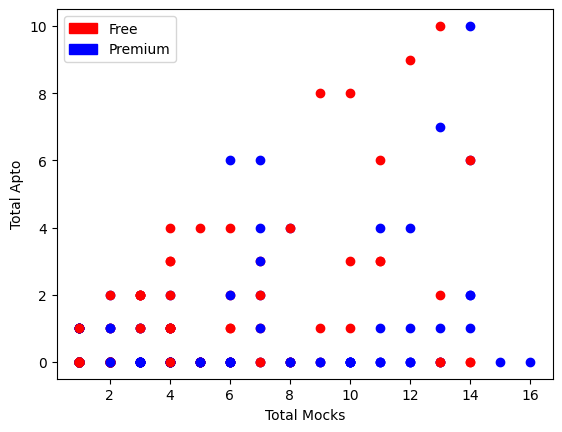

In [228]:
# Plotting the number of apto topics by user and diferent color for the users by isPremium

fig, ax = plt.subplots()
colors = ['red', 'blue']
for i, user in users_aptos_merged.iterrows():
    color = colors[int(user['isPremium'])]
    ax.scatter(user['totalMocks'], user['totalApto'], color=color)
ax.set_xlabel('Total Mocks')
ax.set_ylabel('Total Apto')
red_patch = mpatches.Patch(color='red', label='Free')
blue_patch = mpatches.Patch(color='blue', label='Premium')
plt.legend(handles=[red_patch, blue_patch])
plt.show()


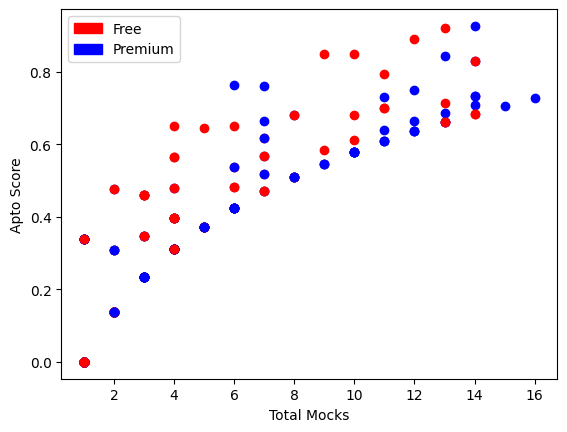

In [229]:
# Plotting the mean of apto topics by user and diferent color for the users by isPremium

fig, ax = plt.subplots()
colors = ['red', 'blue']
for i, user in users_aptos_merged.iterrows():
    color = colors[int(user['isPremium'])]
    ax.scatter(user['totalMocks'], user['apto_score_normalized'], color=color)
ax.set_xlabel('Total Mocks')
ax.set_ylabel('Apto Score')
red_patch = mpatches.Patch(color='red', label='Free')
blue_patch = mpatches.Patch(color='blue', label='Premium')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

The right rate is higher in premium users than in freemim users

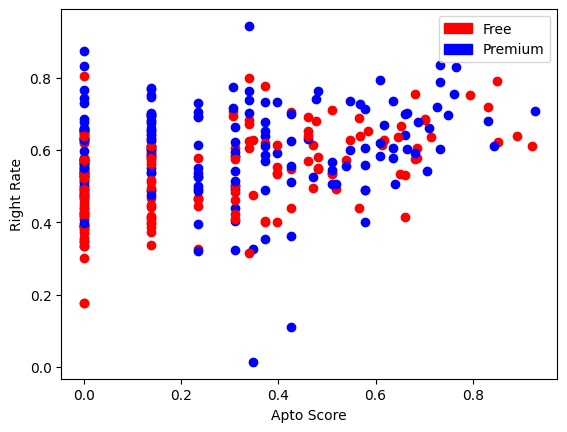

In [230]:
# Plotting Columns Plot of the meanApto and rightRate by user and diferent color for the users by isPremium

fig, ax = plt.subplots()
colors = ['red', 'blue']
for i, user in users_aptos_merged.iterrows():
    color = colors[int(user['isPremium'])]
    ax.scatter(user['apto_score_normalized'], user['rightRate'], color=color)
ax.set_xlabel('Apto Score')
ax.set_ylabel('Right Rate')
red_patch = mpatches.Patch(color='red', label='Free')
blue_patch = mpatches.Patch(color='blue', label='Premium')
plt.legend(handles=[red_patch, blue_patch])
plt.show()


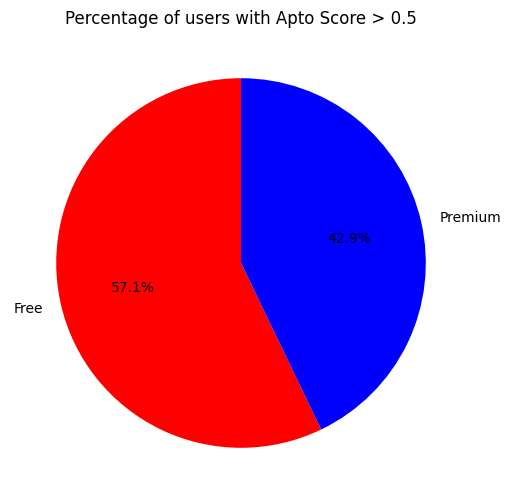

In [231]:
# Filtrar usuarios con apto_score_normalized > 0.5
above_05 = users_aptos_merged[users_aptos_merged['apto_score_normalized'] > 0.7]

# Contar premium vs free
counts = above_05['isPremium'].value_counts()

# Crear pie chart
labels = ['Free', 'Premium']
colors = ['red', 'blue']
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of users with Apto Score > 0.5')
plt.show()




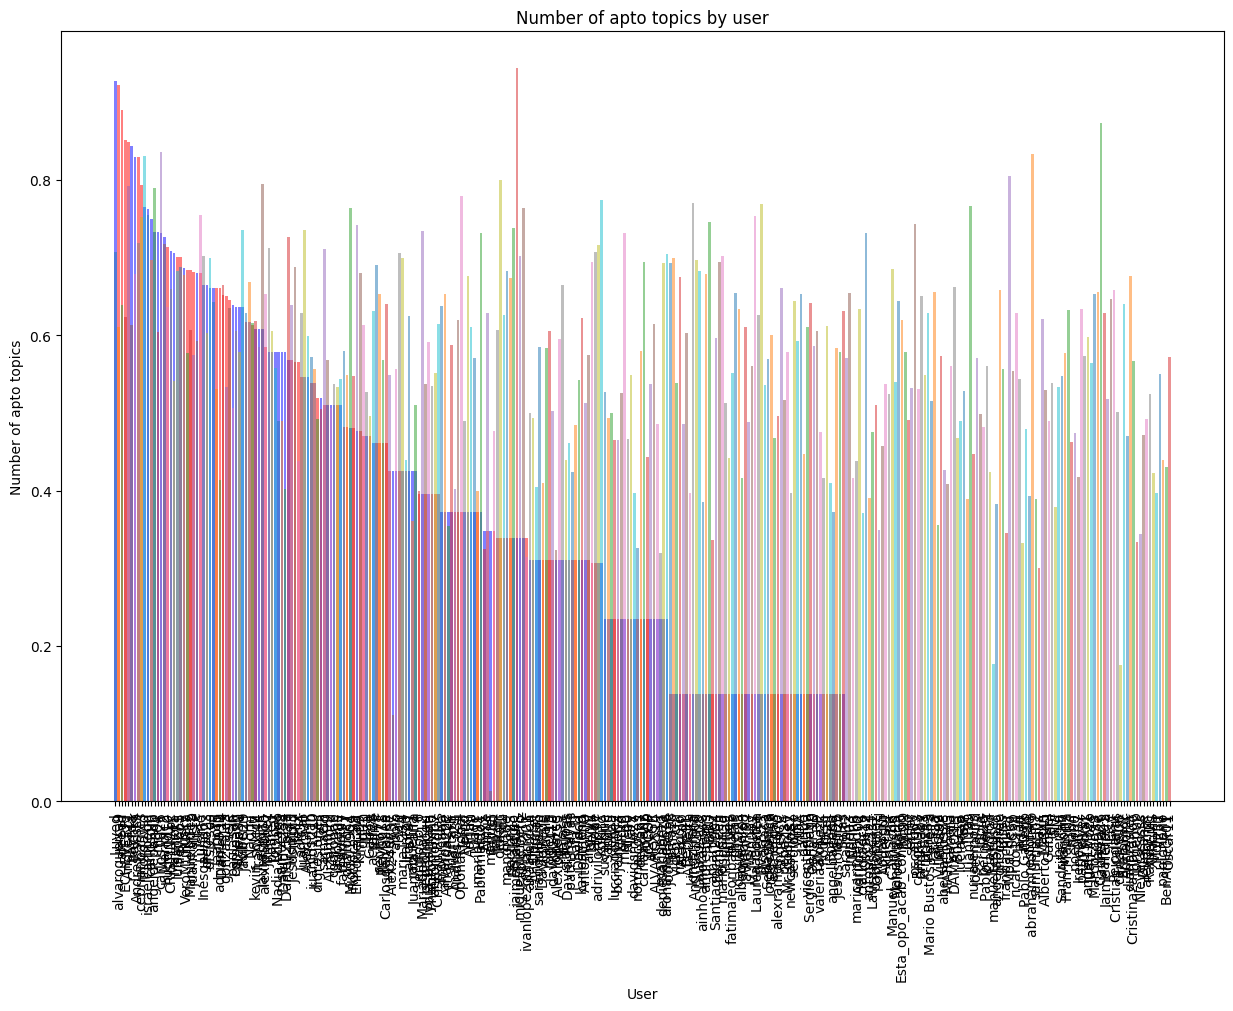

In [232]:
plt.figure(figsize=(15, 10))
colors = ['red', 'blue'] # red for free users and blue for premium users
for i, user in users_aptos_merged.iterrows():
    color = colors[int(user['isPremium'])]
    plt.bar(user['username'], user['apto_score_normalized'], color=color, alpha=0.5)
    plt.bar(user['username'], user['rightRate'], alpha=0.5)

plt.xticks(rotation=90)
plt.xlabel('User')
plt.ylabel('Number of apto topics')
plt.title('Number of apto topics by user')
plt.show()


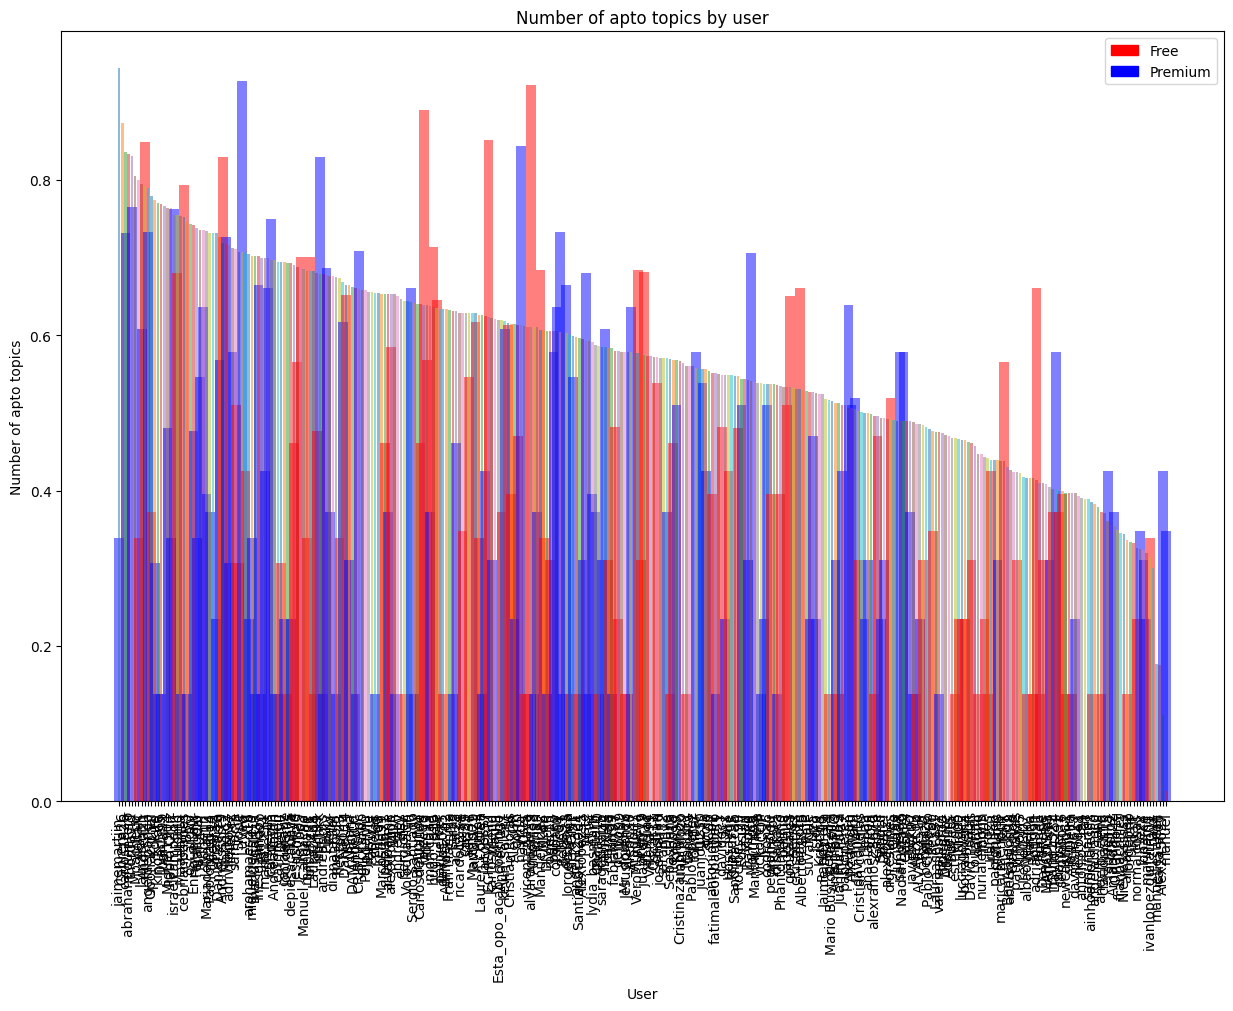

In [233]:
# sorting by right rate
users_aptos_merged = users_aptos_merged.sort_values(by='rightRate', ascending=False)
#plotting the right rate
plt.figure(figsize=(15, 10))
colors = ['red', 'blue'] # red for free users and blue for premium users
for i, user in users_aptos_merged.iterrows():
    color = colors[int(user['isPremium'])]
    plt.bar(user['username'], user['apto_score_normalized'], color=color, alpha=0.5, width=3)
    plt.bar(user['username'], user['rightRate'], alpha=0.5)

plt.xticks(rotation=90)
plt.xlabel('User')
plt.ylabel('Number of apto topics')
plt.title('Number of apto topics by user')
# Plot the legend
red_patch = mpatches.Patch(color='red', label='Free')
blue_patch = mpatches.Patch(color='blue', label='Premium')
plt.legend(handles=[red_patch, blue_patch])

plt.show()


## Exploring questions score agruped one hundred at a time

In [234]:
questions.head()
questions_agenda = questions[questions['topic'] <= 45]
questions_agenda.head()

,id,question,answer1,answer2,answer3,solution,tip,topic,article,answer4,...,shuffled,law_id,num_answered,num_fails,num_empty,num_first_answered,num_first_fails,num_first_empty,difficult_rate,difficult_unique_rate
0,202105130107,Indica cuál de los siguientes países no perten...,Austria.,Liechtenstein.,Chipre.,3,Existen dos (2) miembros adicionales de la Uni...,4,NaN,NaN,...,True,NaN,677,140,40,NaN,NaN,NaN,0.206795,1.000000e-07
3,202210240122,"Según la Ley Orgánica 7/2021, de 26 de mayo, d...",3 meses.,Un año.,Seis meses.,3,"Ley Orgánica 7/2021, de 26 de mayo, de protecc...",26,NaN,NaN,...,True,NaN,349,98,39,NaN,NaN,NaN,0.280802,1.000000e-07
4,202112160113,¿Quién de los siguientes NO está legitimado pa...,Un hermano del detenido.,El Juez de Instrucción del lugar del lugar en ...,Un descendiente del detenido.,2,Según la LO 6/1984 Reguladora del procedimient...,21,NaN,NaN,...,True,NaN,484,96,37,NaN,NaN,NaN,0.198347,1.000000e-07
23,202009220124,La carrocería de un vehículo:,Forma parte de la seguridad activa del mismo.,Forma parte de la seguridad pasiva del mismo.,Forma parte de la seguridad terciaria del mismo.,2,Elementos de seguridad pasiva.\n\nLa carrocerí...,44,NaN,NaN,...,True,NaN,417,66,18,NaN,NaN,NaN,0.158273,1.000000e-07
44,2022121604837,Definción de seguridad interna,"Conjunto de elementos sociales, económicos, la...",Condiciones socioambientales que proporcionan ...,Sensación individual de seguridad que se basa ...,3,"La seguridad interna, innata o subjetiva, es l...",33,NaN,NaN,...,True,NaN,1,0,1,NaN,NaN,NaN,1.000000,1.000000e-07


In [235]:
user_tests.head()

,id,userId,topics,questions,answers,correction,rightQuestions,wrongQuestions,finalized,updatedAt,...,studyMode,studyFailed,studyWhite,isMock,isSurvival,type_topics,difficulty_end,visible,number_of_lives,score
0,121204,8115,[],"[202009180114, 202211170302, 202208120124, 202...","[1, 3, 2, 3, 3, 2, 3, 2, 2, 3, None, None]",atTheEnd,7,3,True,2024-11-28T21:58:54.760378,...,False,False,False,False,True,NaN,0.21,True,0,4.58333
1,121205,8115,[],"[202009230118, 202302050308, 202301300346, 202...","[1, 3, 3, 3, 3, 3, 2, 3, 1, None]",atTheEnd,6,3,True,2024-11-28T22:02:02.162273,...,False,False,False,False,True,NaN,0.20,True,0,4.50000
2,121206,10132,[],"[202205120115, 202210230323, 202009130105, 202...","[1, 2, 3, 2, 1, 1, 1, 3, 1, 1]",atTheEnd,2,8,True,2024-11-28T22:04:27.358783,...,False,False,False,False,False,NaN,0.20,True,0,0.00000
3,95623,3211,[],"[202210200107, 202108020125, 202212210302, 202...","[3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, None, ...",atTheEnd,77,14,True,2024-09-02T18:44:52.337902,...,False,False,False,False,False,NaN,0.20,True,0,7.00000
4,95624,5599,[38],"[202211260224, 202204210122, 202211260210, 202...","[2, 1, 2, None, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, ...",byQuestion,14,2,True,2024-09-02T18:44:45.180801,...,False,False,False,False,False,NaN,0.20,True,0,6.50000


In [236]:
'''

import ast
import pandas as pd

# Función para evaluación segura
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return []

# Aplicar evaluación segura
user_tests['questions_list'] = user_tests['questions'].apply(safe_literal_eval)
user_tests['answers_list'] = user_tests['answers'].apply(safe_literal_eval)

# Filtrar filas con longitudes coincidentes
user_tests = user_tests[user_tests['questions_list'].str.len() == user_tests['answers_list'].str.len()]

# Explode columnas
exploded = user_tests.explode(['questions_list', 'answers_list'])

# Renombrar columnas
exploded = exploded.rename(columns={
    'questions_list': 'questionId',
    'answers_list': 'answer'
})

# Realizar el merge
merged_df = exploded.merge(
    questions[['id', 'solution']], 
    left_on='questionId', right_on='id', 
    how='left'
)

# Función de puntuación
def score_function(row):
    ans = row['answer']
    sol = row['solution']
    if pd.isna(ans):
        return 0  # No respondido
    elif ans == sol:
        return 1  # Acierto
    else:
        return -1  # Fallo

# Calcular puntuación
merged_df['score'] = merged_df.apply(score_function, axis=1)

# Seleccionar columnas finales y exportar
user_test_answers_new_df = merged_df[['userId', 'questionId', 'score', 'answer', 'updatedAt']]
user_test_answers_new_df.to_csv('user_test_answers.csv', index=False)

# Mostrar primeras filas
print(user_test_answers_new_df.head())

user_test_answers_new_df.head()
# save the data to a csv file
user_test_answers_new_df.to_csv('user_test_answers.csv', index=False)

'''


"\n\nimport ast\nimport pandas as pd\n\n# Función para evaluación segura\ndef safe_literal_eval(x):\n    try:\n        return ast.literal_eval(x) if isinstance(x, str) else x\n    except:\n        return []\n\n# Aplicar evaluación segura\nuser_tests['questions_list'] = user_tests['questions'].apply(safe_literal_eval)\nuser_tests['answers_list'] = user_tests['answers'].apply(safe_literal_eval)\n\n# Filtrar filas con longitudes coincidentes\nuser_tests = user_tests[user_tests['questions_list'].str.len() == user_tests['answers_list'].str.len()]\n\n# Explode columnas\nexploded = user_tests.explode(['questions_list', 'answers_list'])\n\n# Renombrar columnas\nexploded = exploded.rename(columns={\n    'questions_list': 'questionId',\n    'answers_list': 'answer'\n})\n\n# Realizar el merge\nmerged_df = exploded.merge(\n    questions[['id', 'solution']], \n    left_on='questionId', right_on='id', \n    how='left'\n)\n\n# Función de puntuación\ndef score_function(row):\n    ans = row['answer']\n

In [237]:
topics.head()

,id,name,category,minutes,isPremium,isSpecial,questions,number,isEnglish,isOfficial,...,author,createdAt,publishedAt,there_are_flash_cards,flash_card_stack,number_flash_cards,special_test_statistics,sum_score,count_participants,avg_score
0,184,¿La Constitución Española garantiza o reconoce?,NaN,10,True,True,19,184,False,False,...,3,2024-07-14T10:43:08.686114+00:00,2024-09-13T08:43:43.054701+00:00,False,NaN,NaN,NaN,442.105,88,5.023920
1,123,Problemas,NaN,8,True,True,15,123,False,False,...,3,2024-07-14T10:43:08.686114+00:00,2024-09-13T08:43:43.054701+00:00,False,NaN,NaN,NaN,659.000,119,5.537815
2,114,Agudeza visual,NaN,3,True,True,15,113,False,False,...,3,2024-07-14T10:43:08.686114+00:00,2024-09-13T08:43:43.054701+00:00,False,NaN,NaN,NaN,2142.670,308,6.956721
3,141,Examen oficial EB XXXIX 2023,NaN,50,True,True,100,141,False,True,...,3,2024-07-14T10:43:08.686114+00:00,2024-09-13T08:43:43.054701+00:00,False,NaN,NaN,NaN,402.950,104,3.874519
4,276,Título Preliminar CE,NaN,5,False,True,10,100,False,False,...,14,2024-11-27T11:18:07.66442+00:00,2025-01-09T08:00:00+00:00,True,93.0,24.0,NaN,0.000,0,NaN


In [238]:
# Unir preguntas con temas (topics)
question_topics = questions.merge(
    topics[['id', 'category', 'name']],
    left_on='topic', 
    right_on='id', 
    how='left',
    suffixes=('_question', '_topic')  # Controlar sufijos
)

# Unir respuestas de usuario con preguntas y temas
question_topic_answers = user_test_answers.merge(
    question_topics, 
    left_on='questionId', 
    right_on='id_question', 
    how='left',
    suffixes=('_answer', '_merged')  # Controlar sufijos
)

# Unir con la tabla de usuarios
user_test_answers_merged = question_topic_answers.merge(
    users, 
    left_on='userId', 
    right_on='id', 
    how='left',
    suffixes=('_final', '_user')  # Controlar sufijos
)

# join with aptos_merged
user_test_answers_merged = user_test_answers_merged.merge(
    users_aptos_merged[['userId', 'apto_score_normalized', 'rightRate']],
    left_on='userId',
    right_on='userId',
    how='left'
    
)


# Renombrar columnas para mayor claridad
user_test_answers_merged = user_test_answers_merged.rename(columns={
    'name': 'topic_name',
    'category': 'topic_category',
    'id_question': 'question_id',
    'id_topic': 'topic_id',
    'updatedAt_answer': 'updated_at_answer',
    'updatedAt_user': 'updated_at_user'
})






# Mostrar el resultado
user_test_answers_merged.head()


,userId,questionId,score,answer,updatedAt_final,question_id,question,answer1,answer2,answer3,...,updated_at_user,goal,goalDate,goalWeek,enabled,lastUsed,isPremium,tutorial,apto_score_normalized,rightRate
0,8115,202009180114,-1,1.0,2024-11-28T21:58:54.760378,2.020092e+11,¿Qué tipo de jurisdicción será la competente p...,La jurisdicción ordinaria será la competente p...,La jurisdicción ordinaria será la competente p...,La jurisdicción ordinaria será la competente p...,...,2024-06-25T21:34:11.798162+00:00,456.0,2024-12-09T00:00:00.000802+00:00,140.0,True,2024-12-13T00:00:00+00:00,True,True,0.0,0.633952
1,8115,202211170302,1,3.0,2024-11-28T21:58:54.760378,2.022112e+11,Dentro del Código Penal nos encontramos:,Delitos contra la vida humana independiente,Delitos contra la vida humana dependiente,Ambas resupestas son correctas,...,2024-06-25T21:34:11.798162+00:00,456.0,2024-12-09T00:00:00.000802+00:00,140.0,True,2024-12-13T00:00:00+00:00,True,True,0.0,0.633952
2,8115,202208120124,1,2.0,2024-11-28T21:58:54.760378,2.022081e+11,Según Piore en tu Teoría del mercado dual:,Las migraciones no se generan solo por los fac...,Las migraciones no se generan solo por los fac...,Las migraciones se generan exclusivamente por ...,...,2024-06-25T21:34:11.798162+00:00,456.0,2024-12-09T00:00:00.000802+00:00,140.0,True,2024-12-13T00:00:00+00:00,True,True,0.0,0.633952
3,8115,202212310321,1,3.0,2024-11-28T21:58:54.760378,2.022123e+11,¿Son obligatorias las gafas de seguridad al ut...,"Sí, siempre, ya que son un elemento de protecc...","Sí, son obligatorias cuando el casco no sea in...",La utilización de gafas de seguridad no es obl...,...,2024-06-25T21:34:11.798162+00:00,456.0,2024-12-09T00:00:00.000802+00:00,140.0,True,2024-12-13T00:00:00+00:00,True,True,0.0,0.633952
4,8115,202301020302,-1,3.0,2024-11-28T21:58:54.760378,2.023010e+11,Una de las características que diferencia un a...,Que la iniciación del accidente de trabajo es ...,Que el estudio de las causas en el caso de la ...,"Generalmente, los accidentes de trabajo necesi...",...,2024-06-25T21:34:11.798162+00:00,456.0,2024-12-09T00:00:00.000802+00:00,140.0,True,2024-12-13T00:00:00+00:00,True,True,0.0,0.633952


In [239]:
# print the columns names

print(user_test_answers_merged.columns)

# print the number
print(user_test_answers_merged.shape)

Index(['userId', 'questionId', 'score', 'answer', 'updatedAt_final',
       'question_id', 'question', 'answer1', 'answer2', 'answer3', 'solution',
       'tip', 'topic', 'article', 'answer4', 'image', 'retro_image',
       'retro_audio', 'author', 'createdAt_final', 'order', 'retro_text',
       'category_question', 'publised', 'shuffled', 'law_id', 'num_answered',
       'num_fails', 'num_empty', 'num_first_answered', 'num_first_fails',
       'num_first_empty', 'difficult_rate', 'difficult_unique_rate',
       'topic_id', 'category_topic', 'topic_name', 'id', 'username',
       'totalQuestions', 'rightQuestions', 'wrongQuestions', 'createdAt_user',
       'updated_at_user', 'goal', 'goalDate', 'goalWeek', 'enabled',
       'lastUsed', 'isPremium', 'tutorial', 'apto_score_normalized',
       'rightRate'],
      dtype='object')
(3101844, 53)


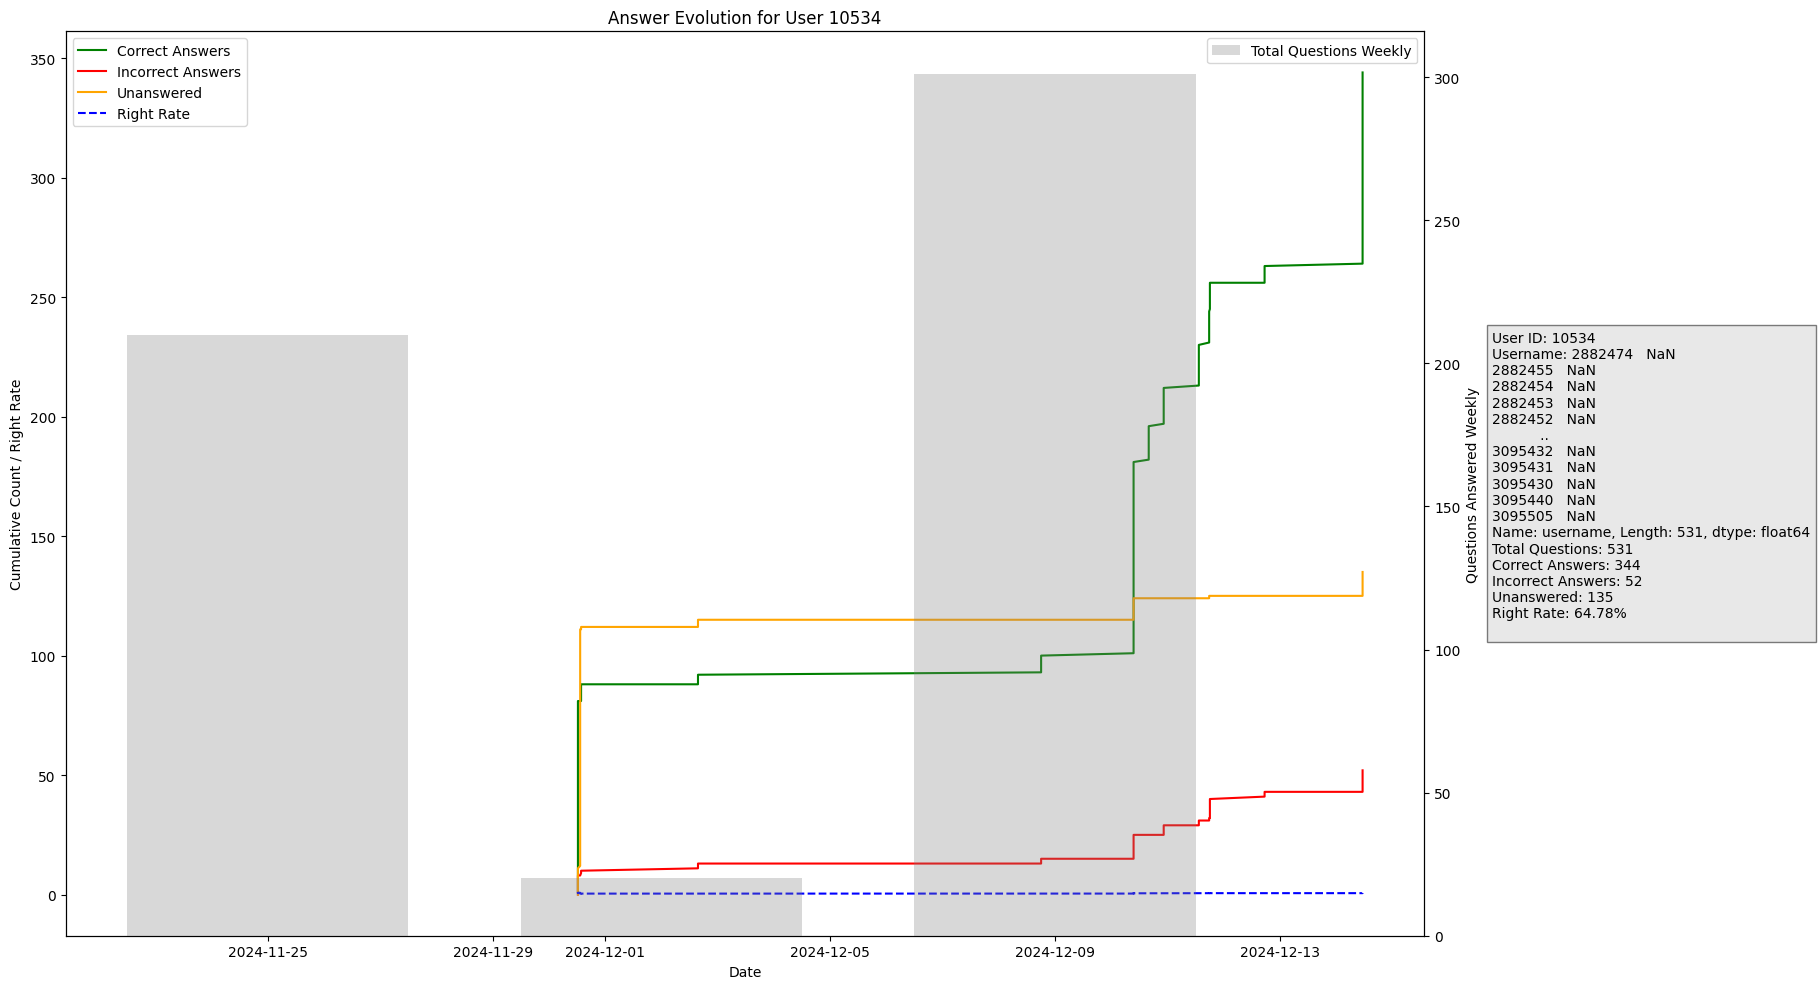

In [240]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_user_right_rate(user_id):
    """
    Plots the cumulative correct, incorrect, unanswered answers, and right rate for a given user over the past month.

    Parameters:
    - user_id (int): The ID of the user to plot.

    Returns:
    - None: Displays a matplotlib plot.
    """
    # Ensure that 'updatedAt_final' is in datetime format before filtering
    user_test_answers_merged['updatedAt_final'] = pd.to_datetime(
        user_test_answers_merged['updatedAt_final'], 
        errors='coerce'
    )
    
    # Obtener datos del usuario
    one_month_ago = pd.Timestamp.now() - pd.DateOffset(months=12)
    user_answers = user_test_answers_merged[
        (user_test_answers_merged['userId'] == user_id) & 
        (user_test_answers_merged['updatedAt_final'] >= one_month_ago)
    ].copy()  # Use copy to avoid SettingWithCopyWarning
    
    # Eliminar fechas inválidas
    user_answers = user_answers.dropna(subset=['updatedAt_final'])
    
    # Ordenar por fecha
    user_answers = user_answers.sort_values(by='updatedAt_final')
    
    if user_answers.empty:
        print(f"No data found for user ID {user_id} in the past month.")
        return
    
    # Calcular métricas acumuladas
    user_answers['cumulative_correct'] = user_answers['score'].eq(1).cumsum()
    user_answers['cumulative_total'] = user_answers['score'].notna().cumsum()
    user_answers['rightRate'] = user_answers['cumulative_correct'] / user_answers['cumulative_total']
    
    user_answers['correct'] = user_answers['score'].eq(1).cumsum()
    user_answers['incorrect'] = user_answers['score'].eq(-1).cumsum()
    user_answers['unanswered'] = user_answers['score'].eq(0).cumsum()
    
    # Asumiendo que el nombre de usuario es consistente, tomar el primero
    user_answers['username'] = user_answers['username'].iloc[0]
    
    # Agrupar por semana y contar total de preguntas
    user_answers['week'] = user_answers['updatedAt_final'].dt.to_period('W').dt.to_timestamp()
    weekly_counts = user_answers.groupby('week').size().reset_index(name='total_questions')
    
    # Plot principal
    fig, ax1 = plt.subplots(figsize=(15, 10))
    
    # Líneas de evolución
    ax1.plot(user_answers['updatedAt_final'], user_answers['correct'], label='Correct Answers', color='green')
    ax1.plot(user_answers['updatedAt_final'], user_answers['incorrect'], label='Incorrect Answers', color='red')
    ax1.plot(user_answers['updatedAt_final'], user_answers['unanswered'], label='Unanswered', color='orange')
    ax1.plot(user_answers['updatedAt_final'], user_answers['rightRate'], label='Right Rate', color='blue', linestyle='--')
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Cumulative Count / Right Rate')
    ax1.legend(loc='upper left')
    ax1.set_title(f'Answer Evolution for User {user_id}')
    
    # Gráfico de barras semitransparente
    ax2 = ax1.twinx()
    ax2.bar(
        weekly_counts['week'], 
        weekly_counts['total_questions'], 
        width=5, 
        alpha=0.3, 
        color='gray', 
        label='Total Questions Weekly'
    )
    ax2.set_ylabel('Questions Answered Weekly')
    ax2.legend(loc='upper right')
    
    # Adding lateral text (Extra information)
    additional_info = (
        f"User ID: {user_id}\n"
        f"Username: {user_answers['username']}\n"
        f"Total Questions: {user_answers.shape[0]}\n"
        f"Correct Answers: {user_answers['cumulative_correct'].iloc[-1]}\n"
        f"Incorrect Answers: {user_answers['incorrect'].iloc[-1]}\n"
        f"Unanswered: {user_answers['unanswered'].iloc[-1]}\n"
        f"Right Rate: {user_answers['rightRate'].iloc[-1]:.2%}\n"
    )
    fig.text(
        1.05, 0.5, additional_info, 
        ha='left', va='center', fontsize=10, 
        bbox=dict(facecolor='lightgray', alpha=0.5), 
        transform=ax1.transAxes
    )
    
    plt.tight_layout()
    plt.show()

# Plot para el usuario 10534
plot_user_right_rate(10534)


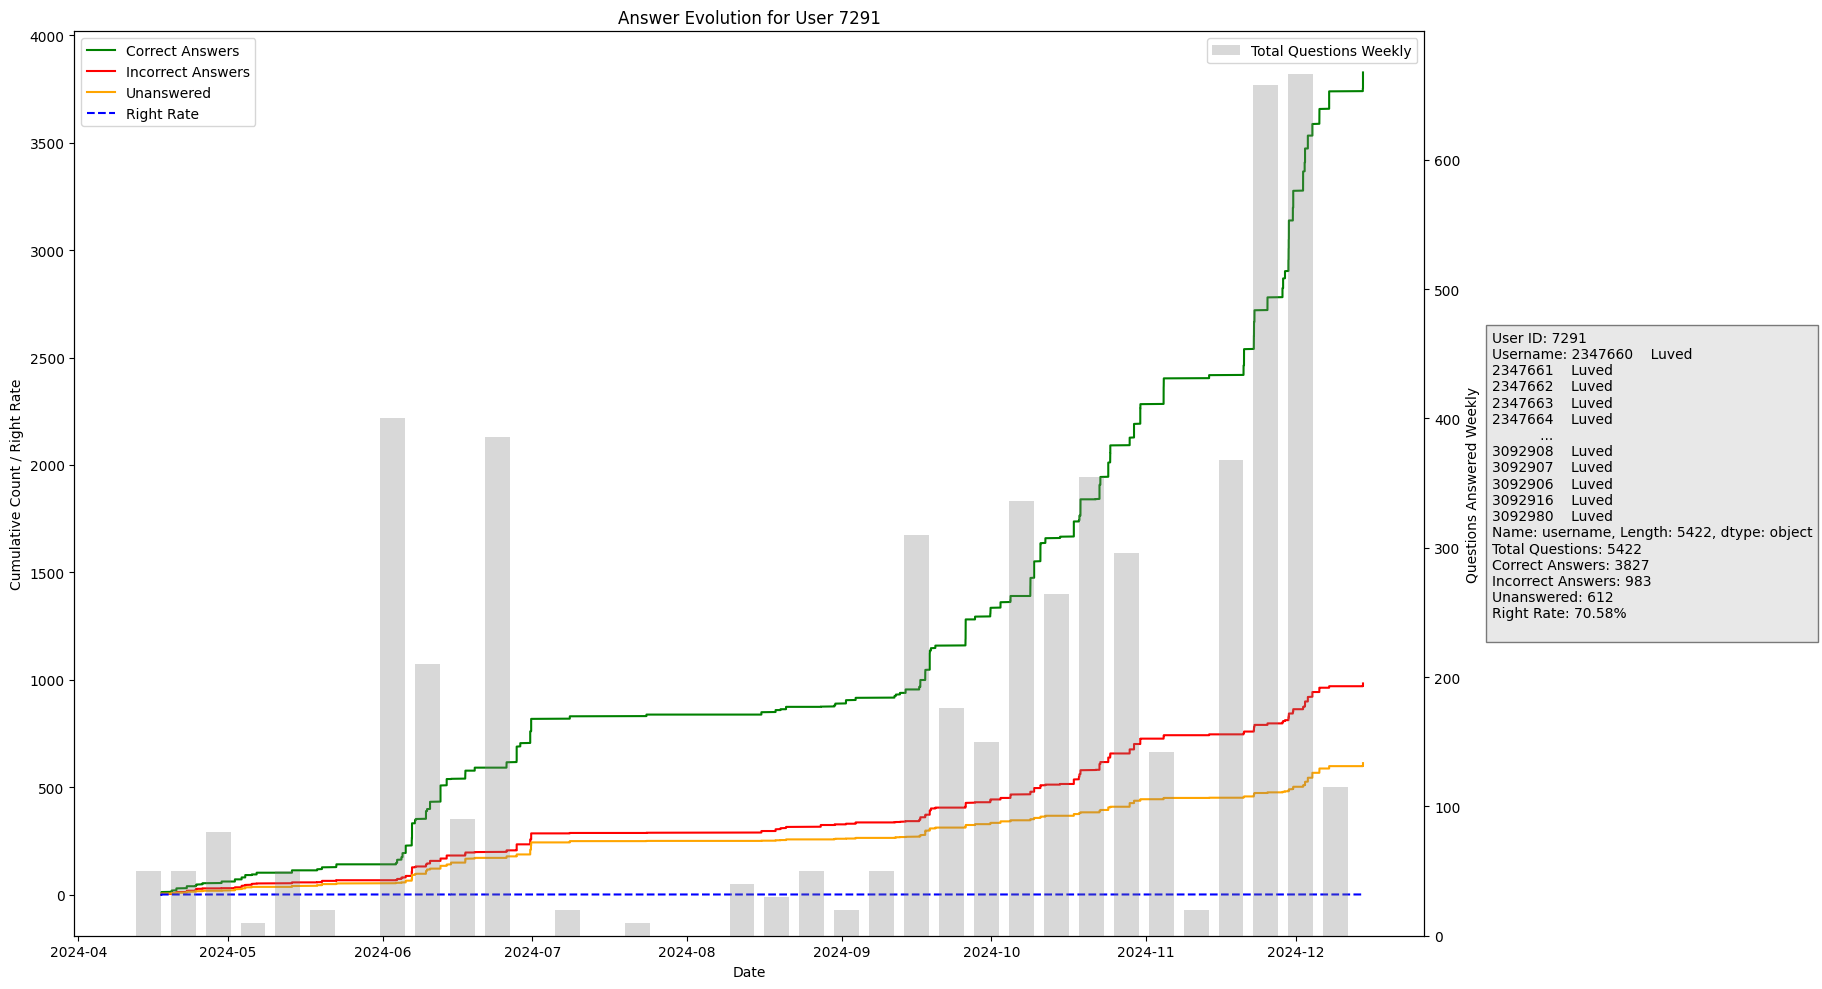

In [241]:
plot_user_right_rate(7291)

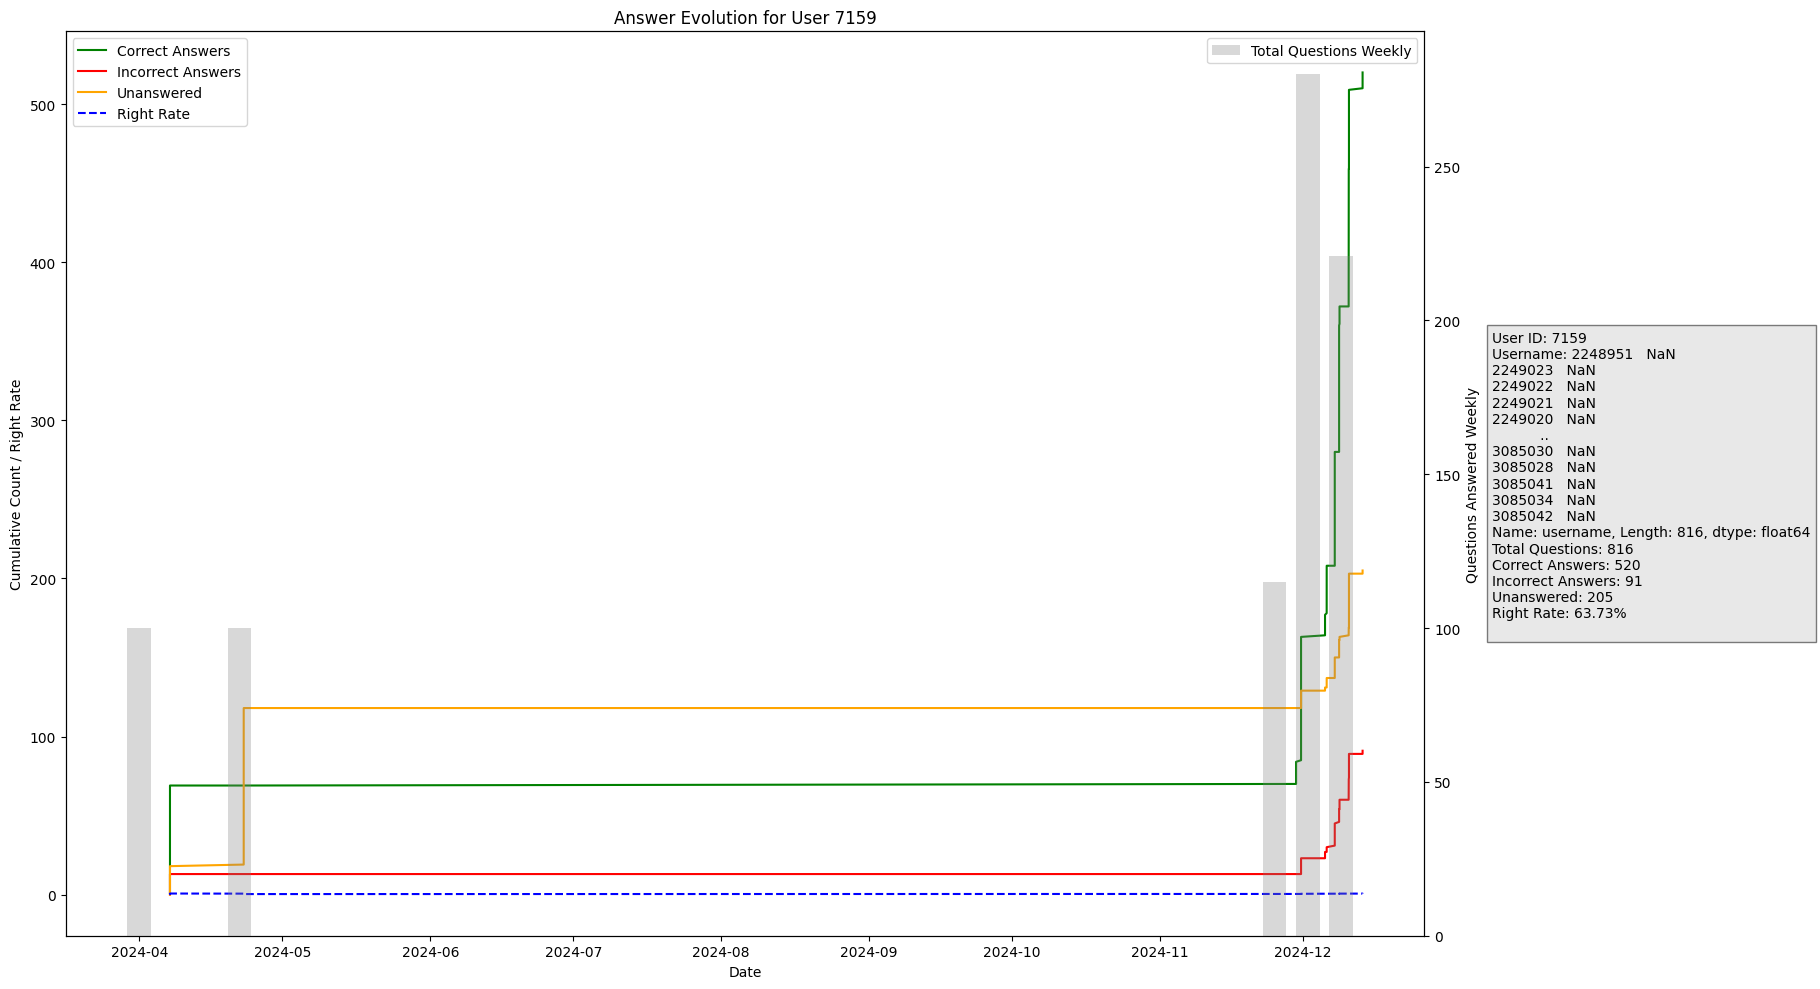

In [242]:
plot_user_right_rate(7159)

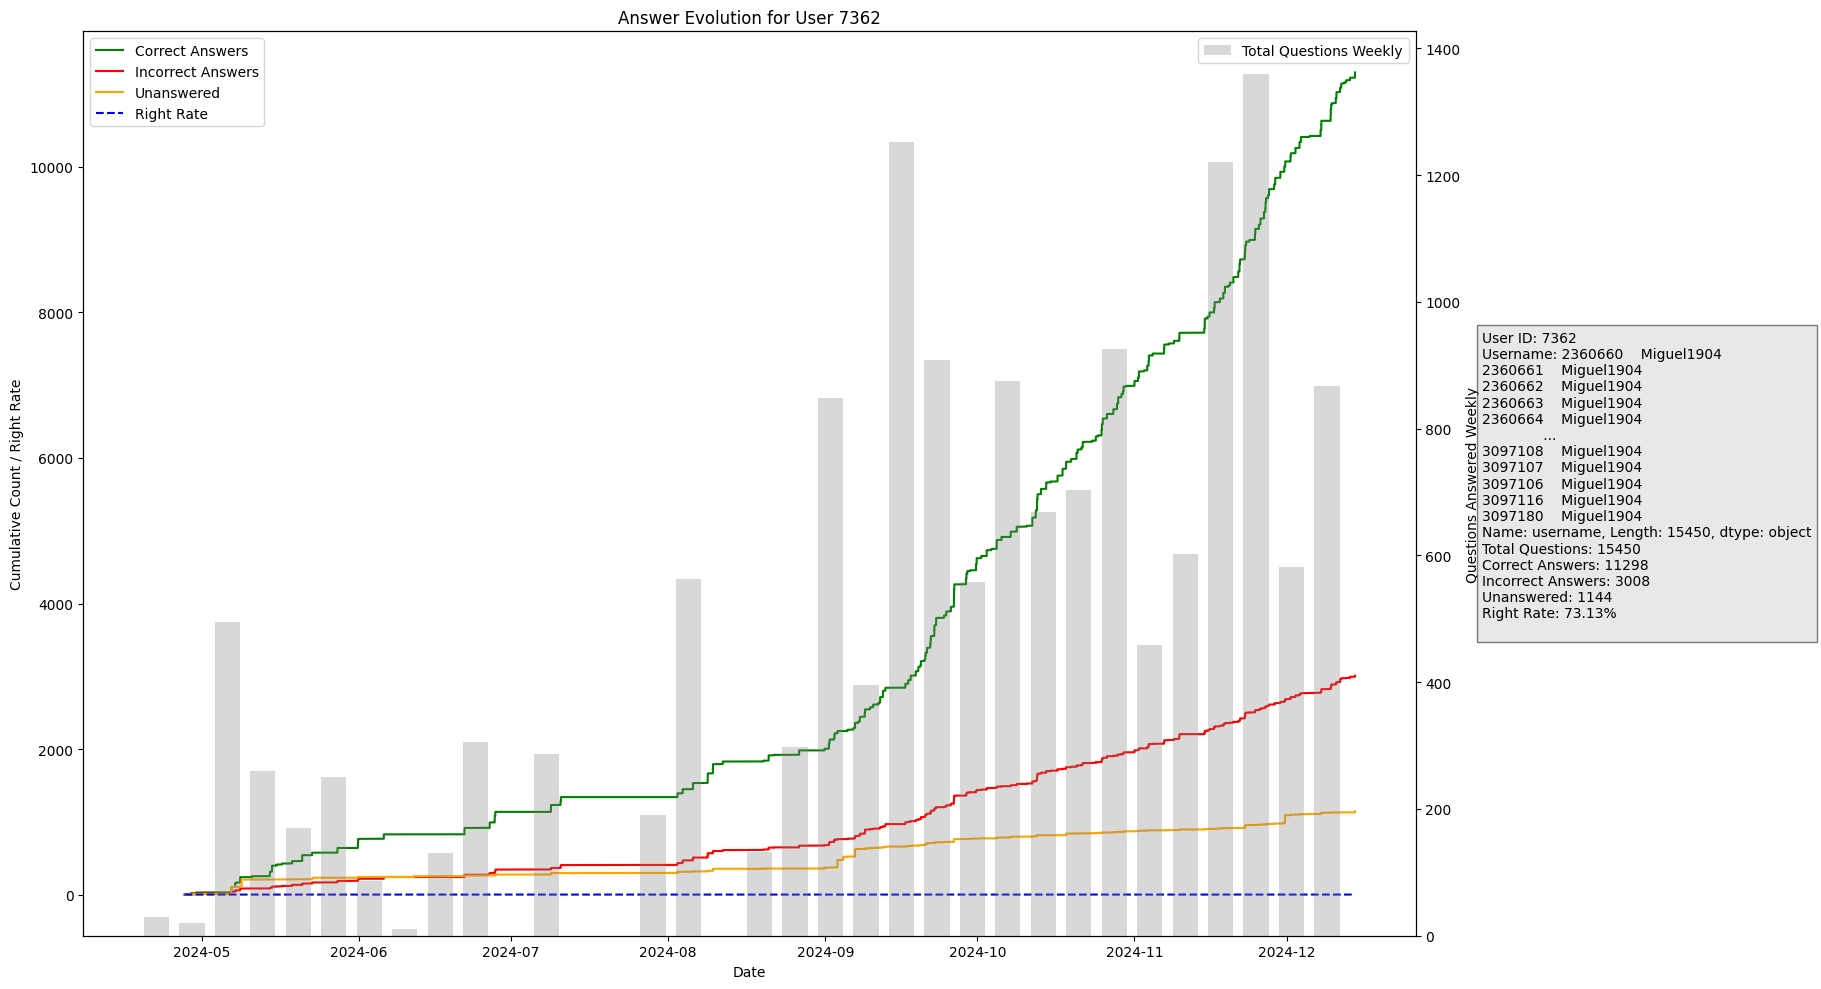

In [243]:
plot_user_right_rate(7362)

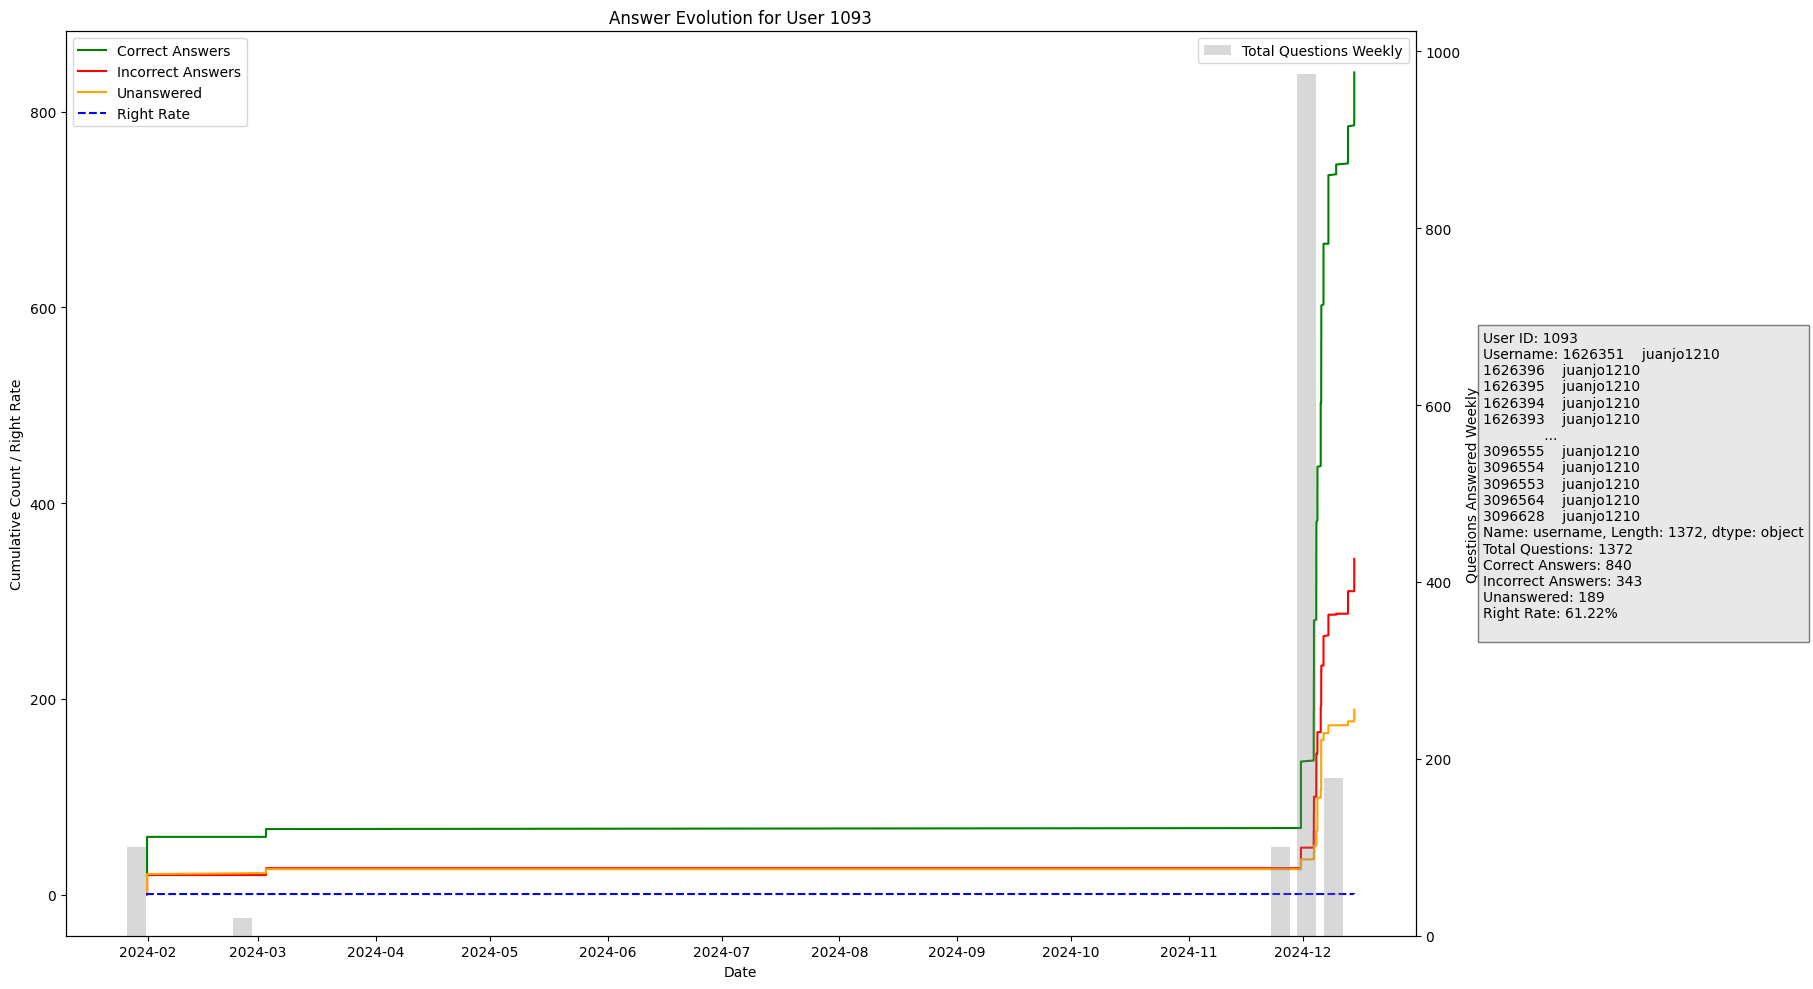

In [244]:
plot_user_right_rate(1093)

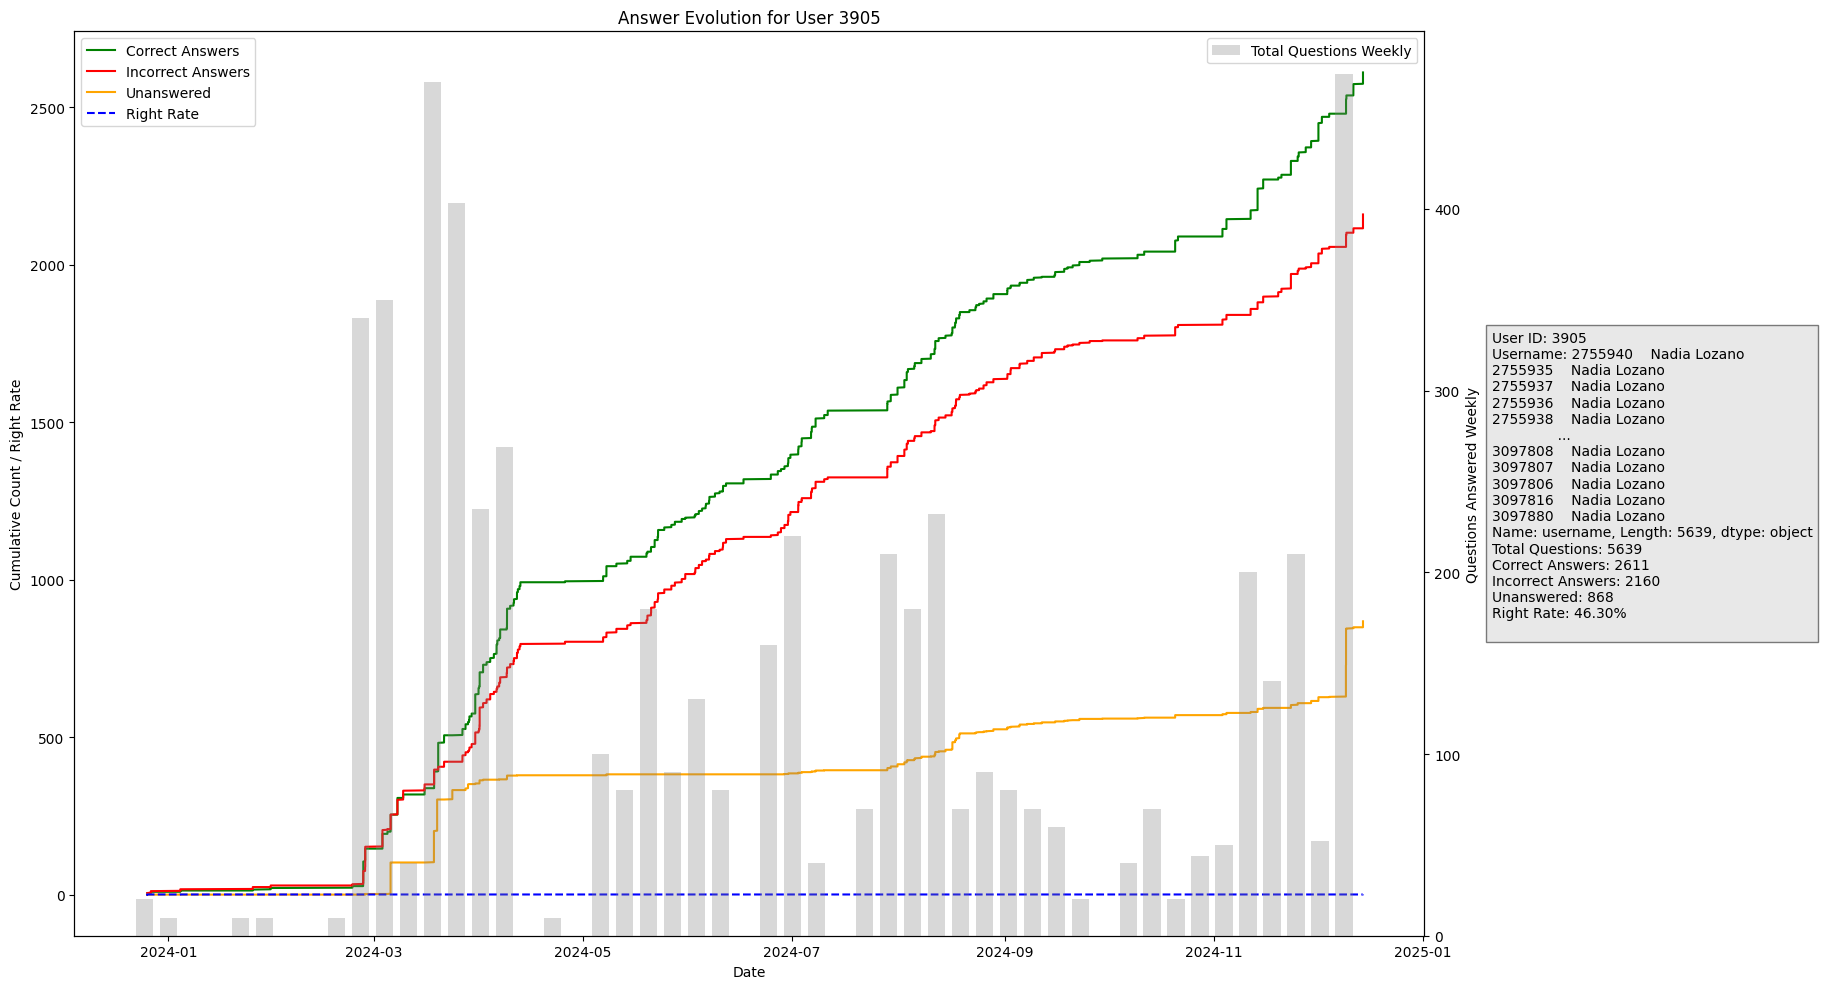

In [245]:
plot_user_right_rate(3905)

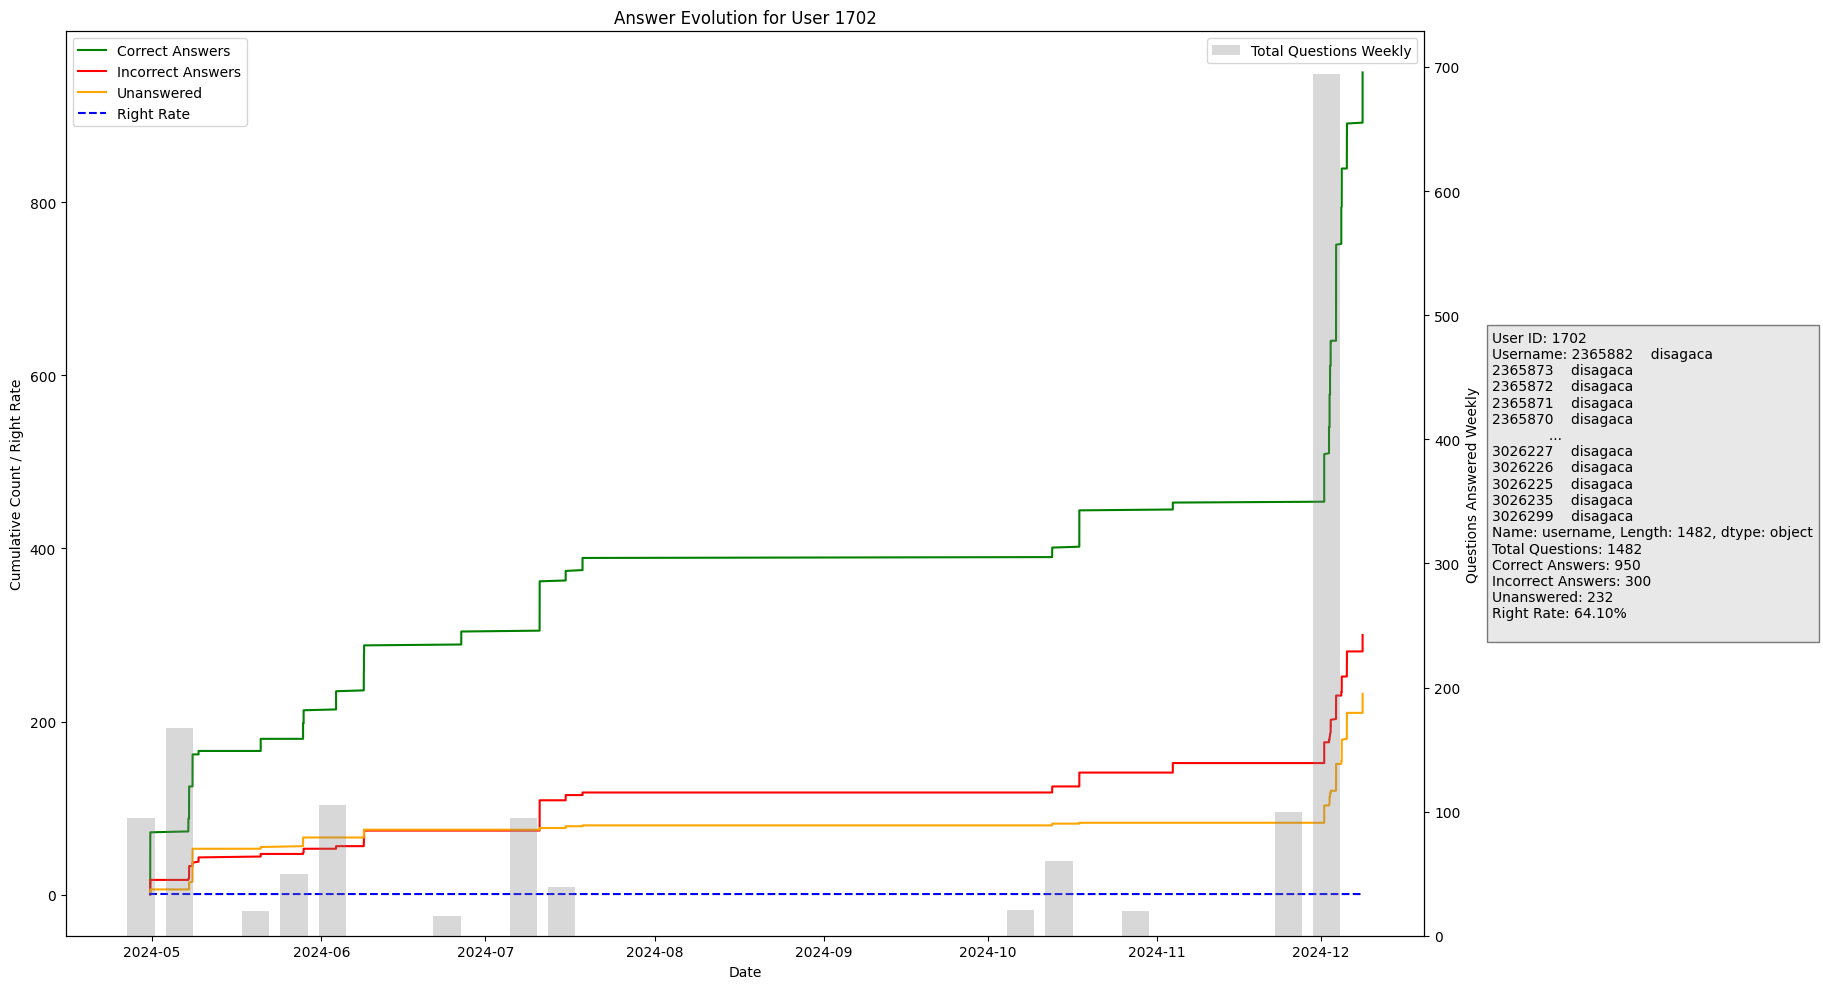

In [246]:
plot_user_right_rate(1702)

In [247]:
user_test_answers_merged.columns

Index(['userId', 'questionId', 'score', 'answer', 'updatedAt_final',
       'question_id', 'question', 'answer1', 'answer2', 'answer3', 'solution',
       'tip', 'topic', 'article', 'answer4', 'image', 'retro_image',
       'retro_audio', 'author', 'createdAt_final', 'order', 'retro_text',
       'category_question', 'publised', 'shuffled', 'law_id', 'num_answered',
       'num_fails', 'num_empty', 'num_first_answered', 'num_first_fails',
       'num_first_empty', 'difficult_rate', 'difficult_unique_rate',
       'topic_id', 'category_topic', 'topic_name', 'id', 'username',
       'totalQuestions', 'rightQuestions', 'wrongQuestions', 'createdAt_user',
       'updated_at_user', 'goal', 'goalDate', 'goalWeek', 'enabled',
       'lastUsed', 'isPremium', 'tutorial', 'apto_score_normalized',
       'rightRate'],
      dtype='object')

In [293]:

# Step 1: Convert 'updatedAt_final' to datetime
user_test_answers_merged['updatedAt_final'] = pd.to_datetime(
    user_test_answers_merged['updatedAt_final'],
    errors='coerce'
)

# Step 2: Drop rows with invalid 'updatedAt_final'
user_test_answers_merged = user_test_answers_merged.dropna(subset=['updatedAt_final'])

# Step 3: Create 'week' column for weekly grouping
user_test_answers_merged['week'] = user_test_answers_merged['updatedAt_final'].dt.to_period('W').dt.to_timestamp()

# Step 4: Group by 'userId' and 'week' and perform aggregations
user_test_answers_by_user_week = user_test_answers_merged.groupby(['userId', 'week']).agg(
    totalQuestions=('questionId', 'count'),
    totalRight=('score', lambda x: (x == 1).sum()),
    totalWrong=('score', lambda x: (x == -1).sum()),
    totalUnanswered=('score', lambda x: (x == 0).sum()),
    meanDifficulty=('difficult_rate', 'mean'),
    totalApto=('apto_score_normalized', 'first'),
    rightRate=('rightRate', 'mean')  # Changed aggregation to 'mean'
).reset_index()

# Step 5: Sort by 'totalQuestions' in descending order
user_test_answers_by_user_week = user_test_answers_by_user_week.sort_values(by='totalQuestions', ascending=False)

# Step 6: Display the top rows
print(user_test_answers_by_user_week.head())


       userId       week  totalQuestions  totalRight  totalWrong  \
18402    8159 2024-11-11            4218        4020         192   
18400    8159 2024-10-28            4040        3800         237   
1095      466 2024-04-01            4015        2672         997   
18404    8159 2024-11-25            3860        3696         136   
7852     2984 2023-05-29            3585        2556         803   

       totalUnanswered  meanDifficulty  totalApto  rightRate  
18402                6        0.240538   0.339735   0.943999  
18400                3        0.250469   0.339735   0.943999  
1095               346        0.262017   0.584530   0.653329  
18404               28        0.243809   0.339735   0.943999  
7852               226        0.247285        NaN        NaN  


In [295]:
# create a improve column right-wrong/ total

user_test_answers_by_user_week['improve'] = (user_test_answers_by_user_week['totalRight'] - user_test_answers_by_user_week['totalWrong']) / user_test_answers_by_user_week['totalQuestions']

# sort by totalQuestions

user_test_answers_by_user_date = user_test_answers_by_user_week.sort_values(by='totalQuestions', ascending=False).reindex()

user_test_answers_by_user_date.head()


,userId,week,totalQuestions,totalRight,totalWrong,totalUnanswered,meanDifficulty,totalApto,rightRate,improve
18402,8159,2024-11-11,4218,4020,192,6,0.240538,0.339735,0.943999,0.907539
18400,8159,2024-10-28,4040,3800,237,3,0.250469,0.339735,0.943999,0.881931
1095,466,2024-04-01,4015,2672,997,346,0.262017,0.584530,0.653329,0.417186
18404,8159,2024-11-25,3860,3696,136,28,0.243809,0.339735,0.943999,0.922280
7852,2984,2023-05-29,3585,2556,803,226,0.247285,NaN,NaN,0.488982


In [ ]:
# Plotting the improve by user and date

def plot_user_improve(user_id):
    """
    Plots the improve of a user by date.

    Parameters:
    - user_id (int): The ID of the user to plot.

    Returns:
    - None: Displays a matplotlib plot.
    """
    user_data = user_test_answers_by_user_date[user_test_answers_by_user_date['userId'] == user_id]
    if user_data.empty:
        print(f"No data found for user ID {user_id}.")
        return
    
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.bar(user_data['updatedAt_final'], user_data['improve'], label='Improve', color='blue', width=0.1)
    ax.set_xlabel('Date')
    ax.set_ylabel('Improve')
    ax.legend(loc='upper left')
    ax.set_title(f'Improve Evolution for User {user_id}')
    plt.show()

    print(f'El número de días que ha realizado preguntas es: {user_data.shape[0]}')
    print(f'La nota de apto del usuario es: {user_data["totalApto"].iloc[0]}')

# Plot para el usuario 10534
plot_user_improve(2807)

In [357]:
# get only the users with apto_score_normalized > 0.5

user_test_answers_by_user_date_apto = user_test_answers_by_user_date[user_test_answers_by_user_date['totalApto'] > 0]
user_test_answers_by_user_date_apto.head()

,userId,week,totalQuestions,totalRight,totalWrong,totalUnanswered,meanDifficulty,totalApto,rightRate,improve
18402,8159,2024-11-11,4218,4020,192,6,0.240538,0.339735,0.943999,0.907539
18400,8159,2024-10-28,4040,3800,237,3,0.250469,0.339735,0.943999,0.881931
1095,466,2024-04-01,4015,2672,997,346,0.262017,0.584530,0.653329,0.417186
18404,8159,2024-11-25,3860,3696,136,28,0.243809,0.339735,0.943999,0.922280
9988,3833,2023-12-04,3555,3037,470,48,0.246555,0.510987,0.710850,0.722082


In [352]:
user_test_answers_by_user_date.shape
# replace nan with 0

user_test_answers_by_user_date = user_test_answers_by_user_date.fillna(0)


In [358]:
#Group by user

user_test_answers_by_user_apto = user_test_answers_by_user_date_apto.groupby('userId').agg(
    totalQuestions=('totalQuestions', 'sum'),
    totalRight=('totalRight', 'sum'),
    totalWrong=('totalWrong', 'sum'),
    totalUnanswered=('totalUnanswered', 'sum'),
    meanDifficulty=('meanDifficulty', 'mean'),
    totalApto=('totalApto', 'first'),
    rightRate=('rightRate', 'mean'),
    totalDays=('week', 'count'),
    improve=('improve', 'median'),
).reset_index()

user_test_answers_by_user_apto.head()

# sort by totalDays

user_test_answers_by_user_apto = user_test_answers_by_user_apto.sort_values(by='totalDays', ascending=False)


user_test_answers_by_user_apto.head(21)


,userId,totalQuestions,totalRight,totalWrong,totalUnanswered,meanDifficulty,totalApto,rightRate,totalDays,improve
8,449,15256,9459,4789,1008,0.260535,0.373237,0.610270,95,0.278571
22,1327,26294,18727,5171,2396,0.255896,0.765341,0.830542,88,0.550148
13,681,8086,4018,1877,2191,0.234975,0.137751,0.603604,83,0.250000
55,2815,10692,5315,2829,2548,0.261398,0.510987,0.533533,78,0.200000
26,1554,6713,3941,1605,1167,0.256758,0.482229,0.580000,76,0.335714
3,217,9922,6876,1613,1433,0.256391,0.546782,0.735780,72,0.526000
24,1447,8398,5326,2266,806,0.259267,0.645024,0.635797,71,0.350000
39,2081,14601,8740,2982,2879,0.236512,0.137751,0.606162,70,0.378235
60,3211,27007,20321,4284,2402,0.246905,0.733066,0.789742,70,0.394444
35,1906,6695,3772,1870,1053,0.258636,0.481163,0.547227,65,0.260000


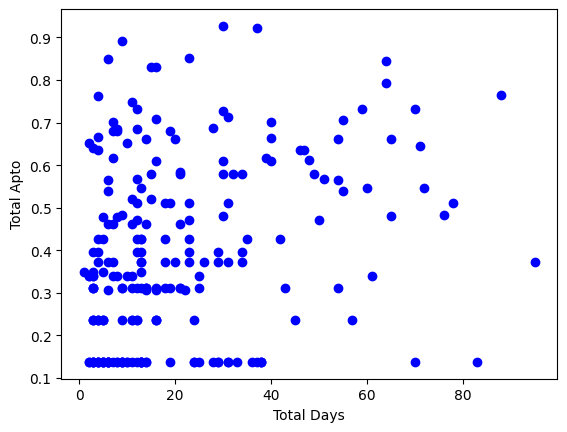

In [359]:
# Plotter total apto vs total days

fig, ax = plt.subplots()

ax.scatter(user_test_answers_by_user_apto['totalDays'], user_test_answers_by_user_apto['totalApto'], color='blue')
ax.set_xlabel('Total Days')
ax.set_ylabel('Total Apto')
plt.show()


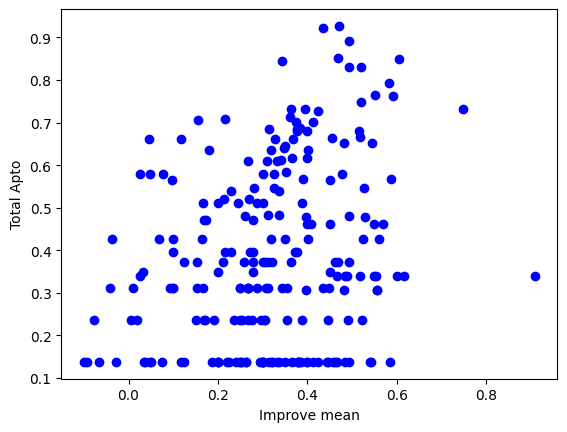

In [360]:
fig, ax = plt.subplots()

ax.scatter(user_test_answers_by_user_apto['improve'], user_test_answers_by_user_apto['totalApto'], color='blue')
ax.set_xlabel('Improve mean')
ax.set_ylabel('Total Apto')
plt.show()


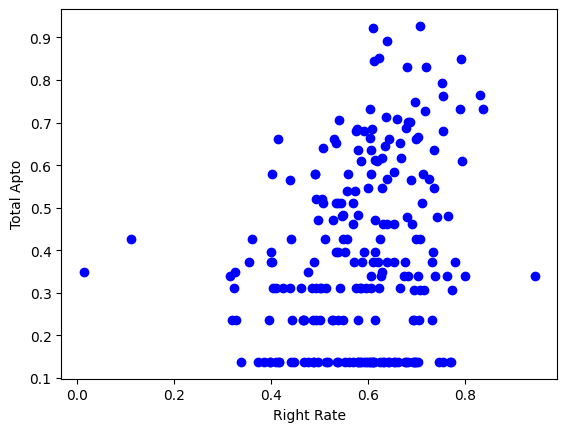

In [361]:
fig, ax = plt.subplots()

ax.scatter(user_test_answers_by_user_apto['rightRate'], user_test_answers_by_user_apto['totalApto'], color='blue')
ax.set_xlabel('Right Rate')
ax.set_ylabel('Total Apto')
plt.show()


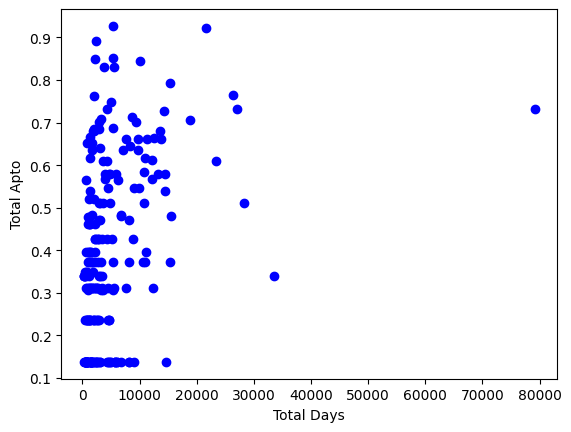

In [362]:
fig, ax = plt.subplots()

ax.scatter(user_test_answers_by_user_apto['totalQuestions'], user_test_answers_by_user_apto['totalApto'], color='blue')
ax.set_xlabel('Total Days')
ax.set_ylabel('Total Apto')
plt.show()
